# Data Preprocessing and Analysis

This notebook analyzes feature distributions, correlations, and preprocessing effects.

In [2]:
import sys
import os
from pathlib import Path

# Get the absolute path to the build directory (parent of HEPMLC)
notebook_dir = Path(os.path.abspath('')).parent  # HEPMLC directory
build_dir = notebook_dir.parent  # build directory

# Add src to path
sys.path.append(str(notebook_dir))

import pandas as pd
from src.preprocessing.feature_analyzer import FeatureAnalyzer

# Load your dataset from build directory
data = pd.read_csv(os.path.join(build_dir, 'test_set.tsv'), sep='\t')

# Define feature and label columns
feature_cols = ['mH2', 'mHD', 'mAD', 'mHDp', 'alpha', 'L2', 'L8', 'vs', 'm22sq']
label_cols = ['valid_BFB', 'valid_Uni', 'valid_STU', 'valid_Higgs']

# Initialize analyzer
analyzer = FeatureAnalyzer(data, feature_cols, label_cols)

# Create output directory in build
output_dir = os.path.join(build_dir, 'preprocessing_analysis')
os.makedirs(output_dir, exist_ok=True)

## Feature Statistics and Distributions

In [3]:
# Generate and display feature statistics
stats = analyzer.generate_feature_stats()
pd.DataFrame(stats).T

,mean,std,min,max,skew,kurtosis
mH2,756.303360,396.567017,125.098308,1499.971710,0.170871,-1.164998
mHD,695.566439,380.229007,1.050396,1499.950285,0.216490,-0.872405
mAD,695.736816,379.223553,1.011494,1499.989430,0.220938,-0.865875
mHDp,843.691608,356.587825,5.091194,1499.992267,0.072875,-1.000679
alpha,-0.012730,0.588970,-1.570353,1.570567,0.026909,0.981334
L2,6.952639,5.569806,0.000024,19.999611,0.810947,-0.523167
L8,1.852001,11.045520,-29.999255,29.999397,-0.115017,0.948044
vs,499.587703,381.425369,1.010577,1499.991247,0.857624,-0.203282
m22sq,234270.554822,143786.617410,2.097307,499998.769337,0.135716,-1.173926


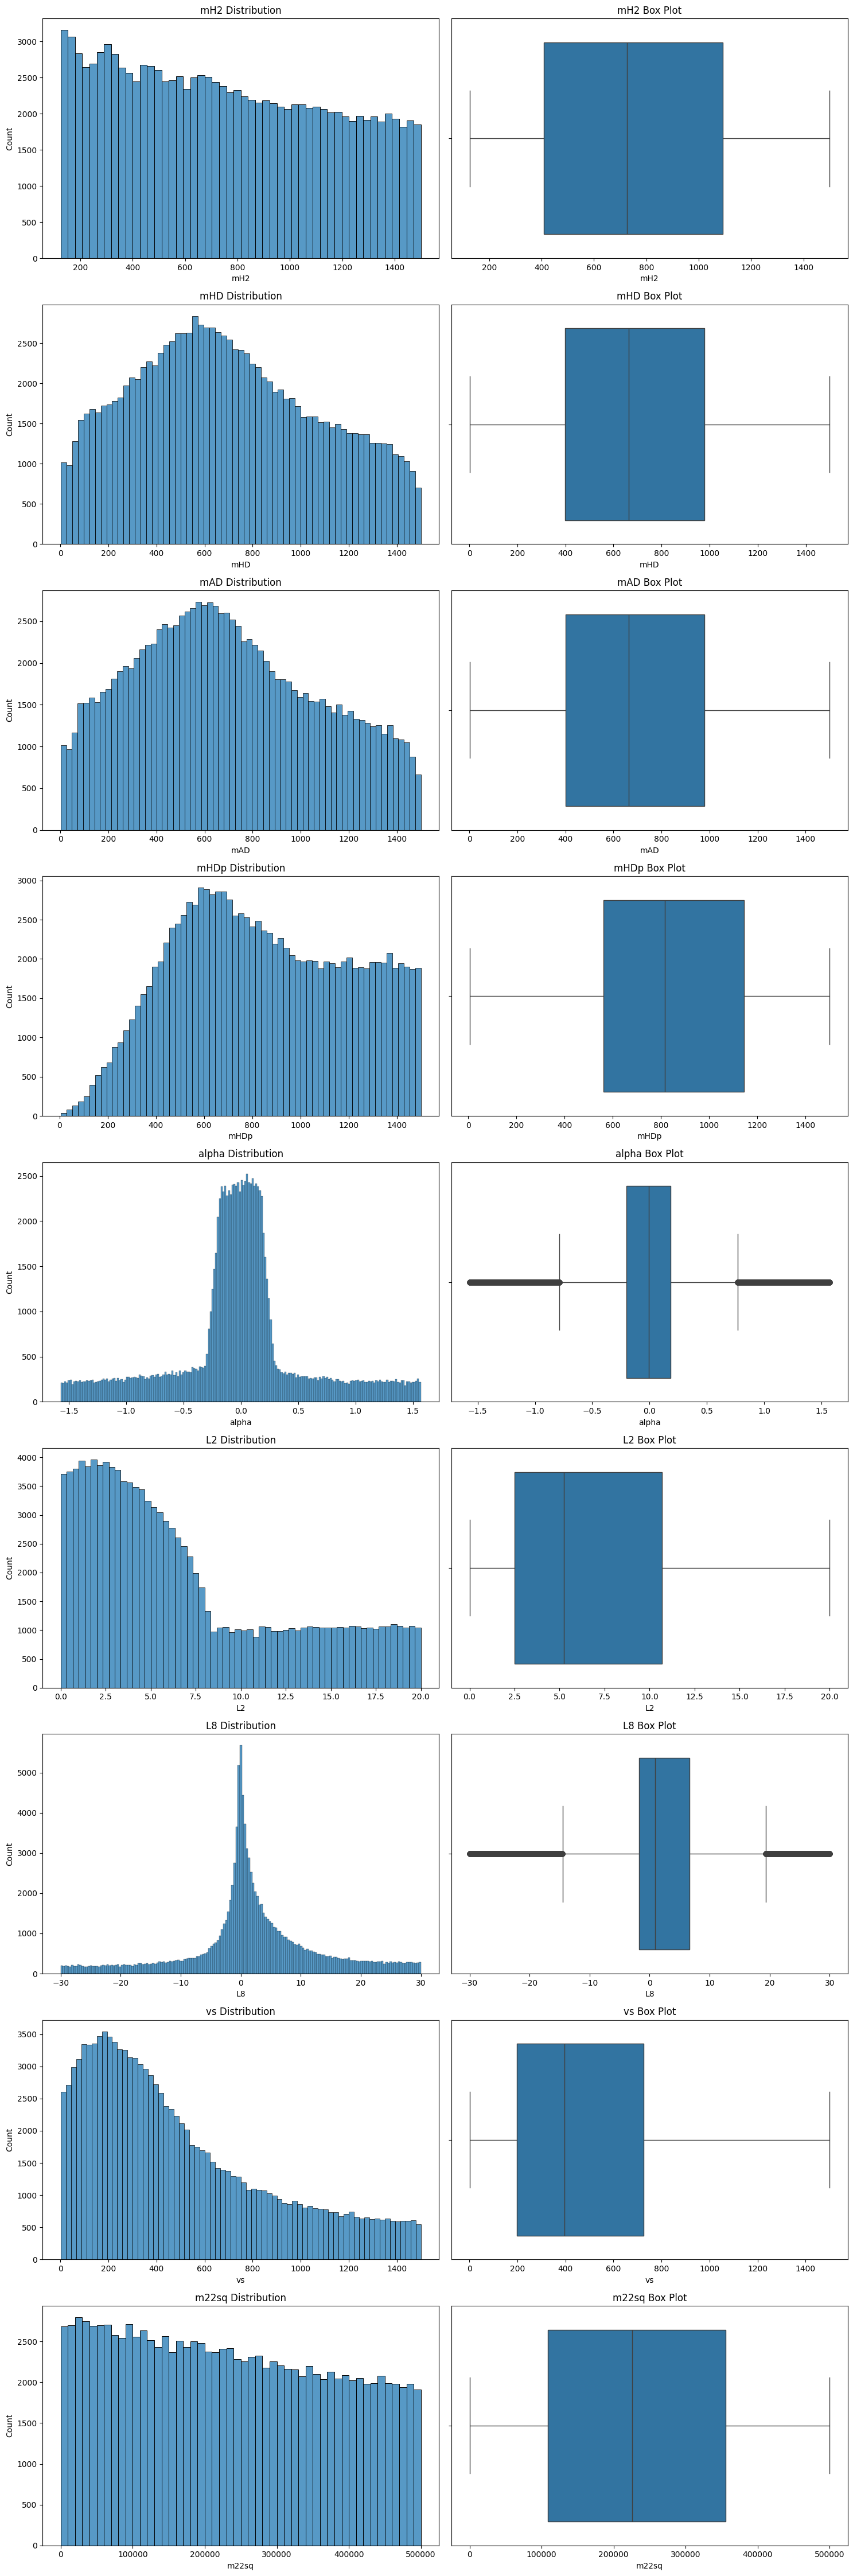

In [4]:
# Plot feature distributions
analyzer.plot_feature_distributions(output_dir)

## Feature Correlations

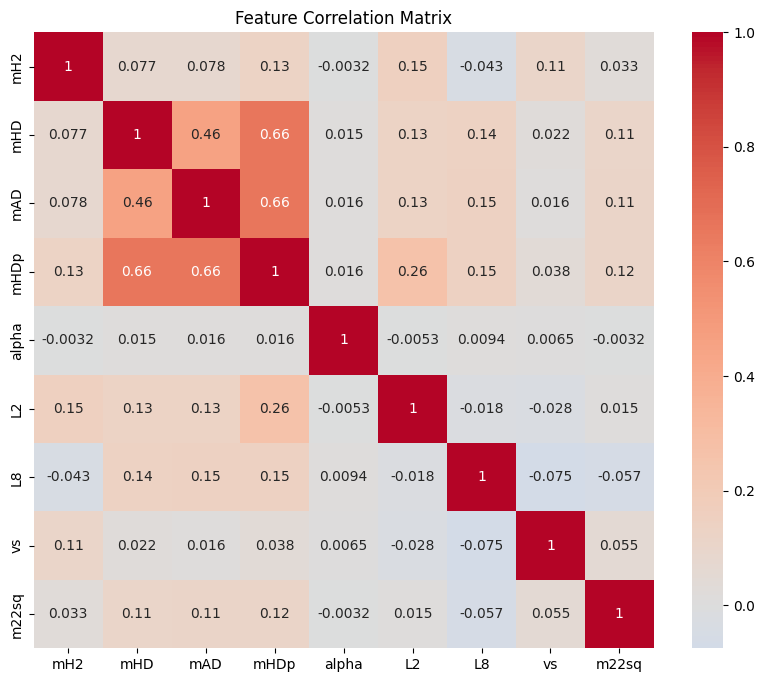

In [5]:
# Plot correlation matrix
analyzer.plot_correlation_matrix(output_dir)

## Preprocessing Effects

In [6]:
# Analyze preprocessing effects
preprocessed_data = analyzer.analyze_preprocessing_effects()

# Display summary statistics for each preprocessing approach
for name, data in preprocessed_data.items():
    print(f"\n{name.upper()} Statistics:")
    print(data.describe())


ORIGINAL Statistics:
                 mH2            mHD            mAD           mHDp  \
count  116140.000000  116140.000000  116140.000000  116140.000000   
mean      756.303360     695.566439     695.736816     843.691608   
std       396.567017     380.229007     379.223553     356.587825   
min       125.098308       1.050396       1.011494       5.091194   
25%       408.806741     398.947083     400.032877     561.661782   
50%       726.331180     663.222257     662.795725     815.363917   
75%      1091.188833     979.804642     979.701376    1143.214314   
max      1499.971710    1499.950285    1499.989430    1499.992267   

               alpha             L2             L8             vs  \
count  116140.000000  116140.000000  116140.000000  116140.000000   
mean       -0.012730       6.952639       1.852001     499.587703   
std         0.588970       5.569806      11.045520     381.425369   
min        -1.570353       0.000024     -29.999255       1.010577   
25%        